# Pràctica 1 - Ajust de Models d'Optimització

- Nom: David Morillo Massagué
- NIU: 1666540

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

In [2]:
def graficar(funcion_sympy, variable):
    # Derivar la funció
    primera_derivada = sp.diff(funcion_sympy, variable)
    segona_derivada = sp.diff(primera_derivada, variable)
    
    # Trobar els punts crítics
    punts_critics = sp.solve(primera_derivada, variable)
    
    # Crear un rang de valors per a graficar la funció
    x_vals = np.linspace(-10, 10, 400)
    y_vals = [funcion_sympy.subs(variable, val) for val in x_vals]
    
    # Graficar la funció
    plt.plot(x_vals, y_vals, label='Funció')
    
    # Avaluar els punts crítics i determinar si són mínims o màxims
    for punt in punts_critics:
        valor_segona_derivada = segona_derivada.subs(variable, punt)
        if valor_segona_derivada > 0:
            # Mínim
            plt.plot(punt, funcion_sympy.subs(variable, punt), 'go', label='Mínim')
        elif valor_segona_derivada < 0:
            # Màxim
            plt.plot(punt, funcion_sympy.subs(variable, punt), 'ro', label='Màxim')
    
    # Mostrar el gràfic
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    plt.title('Gràfic de la funció amb punts crítics')
    plt.grid(True)
    plt.show()

# Problema 1

Foto de l'exercici resolt:

![ex1.jpg](ex1.jpg)


Punt crític: 2
Valor de la segona derivada: 2
És un mínim local.


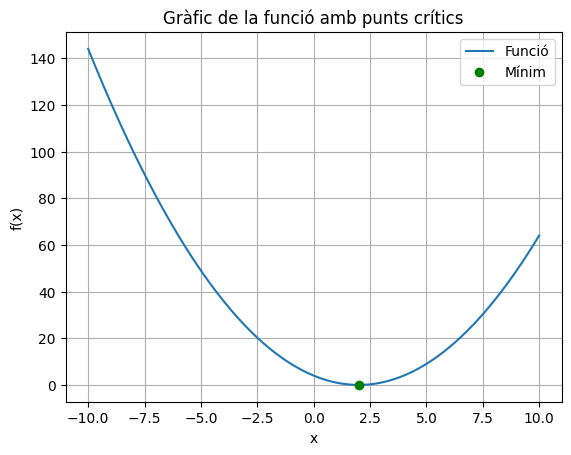

In [3]:
from sympy import symbols, diff, solve

# Definir la variable i la funció
x = symbols('x')
f = (x-2)**2

# Derivades de primer i segon ordre
df = diff(f, x)
d2f = diff(df, x)

# Restricció
def constraint(x):
    return x >= 1

# Trobar punts crítics
critical_points = solve(df, x)

# Analitzar punts crítics
for point in critical_points:
    if not constraint(point): # Si no compleix la restricció,
        continue             # no l'avaluem
    hessian_value = d2f.subs(x, point)  # Utilitzem la segona derivada per a una funció d'una variable
    print(f"\nPunt crític: {point}")
    print(f"Valor de la segona derivada: {hessian_value}")
    if hessian_value > 0:
        print("És un mínim local.")
    elif hessian_value < 0:
        print("És un màxim local.")
    else:
        print("És un punt de sella.")
        
graficar(f, x)

# Problema 3


Punt crític: 0
Valor de la segona derivada: 2
És un mínim local. És convexa.


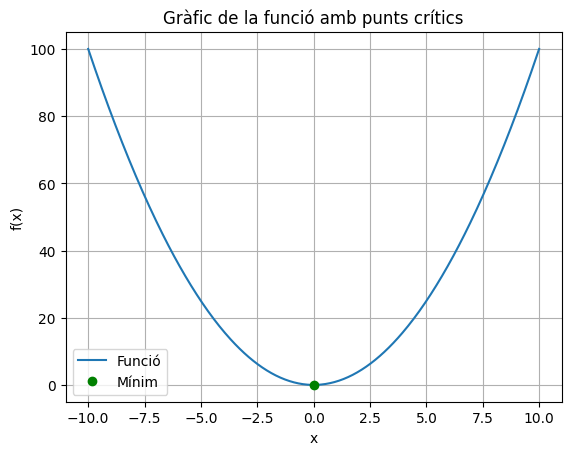

In [4]:
# trobar la convexitat de la funció f(x) = x**2

x = sp.Symbol('x')
f = x**2

from sympy import diff, solve, hessian

# Derivades de primer i segon ordre
df = diff(f, x)
d2f = diff(df, x)
# Trobar punts crítics
critical_points = solve(df, x)
# Calcular la matriu Hessiana
H = hessian(f, [x])
# Analitzar punts crítics

for point in critical_points:
    hessian_value = d2f.subs(x, point)  # Utilitzem la segona derivada per a una funció d'una variable
    print(f"\nPunt crític: {point}")
    print(f"Valor de la segona derivada: {hessian_value}")
    if hessian_value > 0:
        print("És un mínim local. És convexa.")
    elif hessian_value < 0:
        print("És un màxim local. És concava.")
    else:
        print("És un punt de sella.")

graficar(f, x)